# **Activity Recognition in Senior Citizens Problem**

#### Héctor Manuel Cárdenas Yáñez	 | A01634615
#### Siddhartha López Valenzuela   | A00227694
#### Álvaro Morán Errejón 		     | A01638034
#### Isaí Ambrocio				         | A01625101

Deploy Server

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

Reading all csv files and concatenate them.

In [ ]:
df501 = pd.read_csv("/content/501.csv")
df502 = pd.read_csv("/content/502.csv")
df503 = pd.read_csv("/content/503.csv")
df504 = pd.read_csv("/content/504.csv")
df505 = pd.read_csv("/content/505.csv")
df506 = pd.read_csv("/content/506.csv")
df507 = pd.read_csv("/content/507.csv")
df508 = pd.read_csv("/content/508.csv")
df509 = pd.read_csv("/content/509.csv")
df510 = pd.read_csv("/content/510.csv")
df511 = pd.read_csv("/content/511.csv")
df512 = pd.read_csv("/content/512.csv")
df513 = pd.read_csv("/content/513.csv")
df514 = pd.read_csv("/content/514.csv")
df515 = pd.read_csv("/content/515.csv")

In [ ]:
dataframes = [df501, df502, df503, df504, df505, df506, df507, df508, df509, df510, df511, df512, df513, df514, df515]

In [ ]:
df = pd.concat(dataframes)

In [ ]:
df.head

<bound method NDFrame.head of                       timestamp    back_x    back_y    back_z   thigh_x  \
0       2021-03-24 14:42:03.839 -0.999023 -0.063477  0.140625 -0.980469   
1       2021-03-24 14:42:03.859 -0.980225 -0.079346  0.140625 -0.961182   
2       2021-03-24 14:42:03.880 -0.950195 -0.076416  0.140625 -0.949463   
3       2021-03-24 14:42:03.900 -0.954834 -0.059082  0.140381 -0.957520   
4       2021-03-24 14:42:03.920 -0.972412 -0.042969  0.142822 -0.977051   
...                         ...       ...       ...       ...       ...   
153512  2021-05-27 10:20:12.779 -0.968018  0.005371  0.283691 -0.953369   
153513  2021-05-27 10:20:12.800 -0.974609 -0.006348  0.284912 -0.959717   
153514  2021-05-27 10:20:12.819 -0.959961 -0.005127  0.278564 -0.972412   
153515  2021-05-27 10:20:12.840 -0.962402  0.000488  0.265625 -0.970215   
153516  2021-05-27 10:20:12.859 -0.963135  0.015137  0.268066 -0.970215   

         thigh_y   thigh_z  label  
0      -0.112061 -0.048096      6

## Exploratory Data Analisis (EDA)

In [ ]:
df.size

14660480

In [ ]:
df.describe()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
count,1.832560e+06,1.832560e+06,1.832560e+06,1.832560e+06,1.832560e+06,1.832560e+06,1.832560e+06
mean,-8.683814e-01,-3.178814e-02,2.244210e-02,-6.763959e-01,8.185066e-03,-3.858819e-01,3.940692e+00
std,2.756643e-01,1.556768e-01,4.279549e-01,5.596829e-01,2.707317e-01,5.087015e-01,2.912512e+00
min,-4.333252e+00,-2.031006e+00,-2.204834e+00,-7.942139e+00,-5.142578e+00,-7.593750e+00,1.000000e+00
25%,-9.909670e-01,-1.093750e-01,-2.692870e-01,-9.855960e-01,-1.132810e-01,-9.770510e-01,1.000000e+00
50%,-9.377440e-01,-1.855500e-02,-9.399400e-02,-9.357910e-01,-1.464800e-02,-1.906740e-01,3.000000e+00
75%,-8.344730e-01,5.761700e-02,3.078610e-01,-7.763700e-02,1.230470e-01,-3.174000e-03,7.000000e+00
max,3.630370e-01,1.576660e+00,1.179199e+00,3.395264e+00,5.725098e+00,3.953369e+00,8.000000e+00


In [ ]:
df.dtypes

timestamp     object
back_x       float64
back_y       float64
back_z       float64
thigh_x      float64
thigh_y      float64
thigh_z      float64
label          int64
dtype: object

In [ ]:
df.isnull().sum()

timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64

In [ ]:
df['label'].unique()

array([6, 3, 1, 7, 8, 5, 4])

Las etiquetas son las siguientes(La etiqueta 2 no aparece en Kaggle):

* 1: walking
* 3: shuffling
* 4: stairs (ascending)
* 5: stairs (descending)
* 6: standing
* 7: sitting
* 8: lying

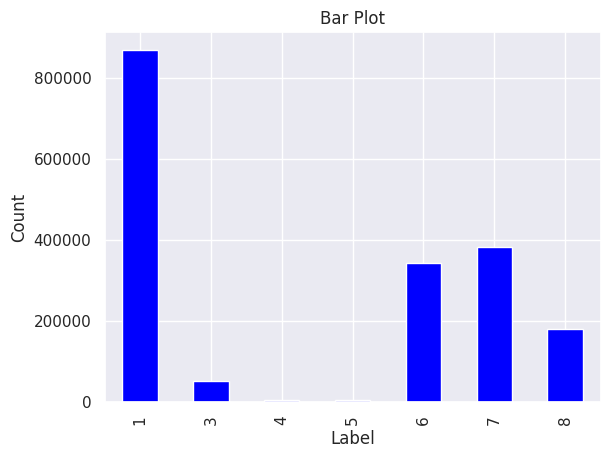

In [ ]:
df['label'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Bar Plot')
plt.show()

Time series para cada variable. Importante: solo se usa una fraccion muy pequeña del dataset para que corra el codigo sin demorarse. Estas visualizaciones ayuden a analizar como cambian las variables con el tiempo.

<Figure size 1200x600 with 0 Axes>

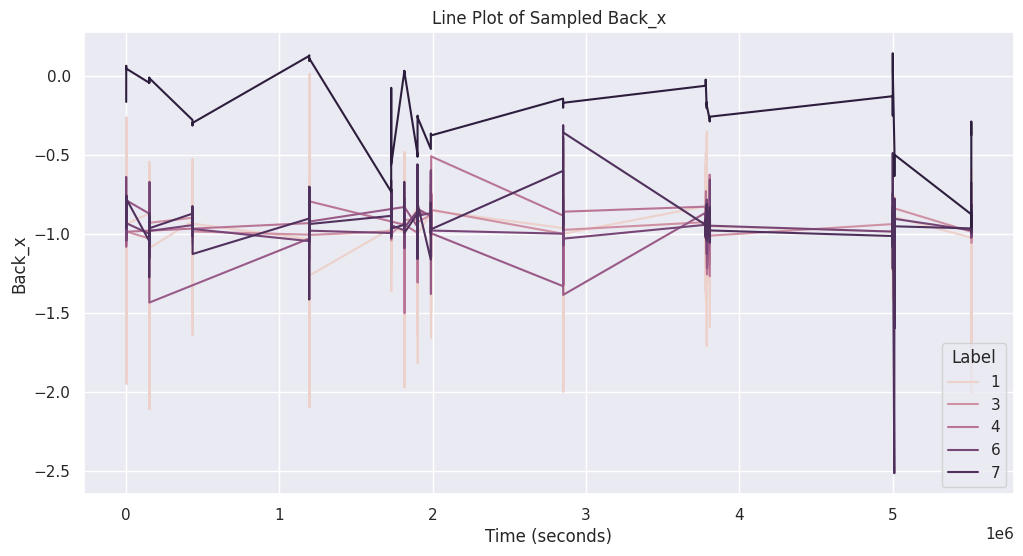

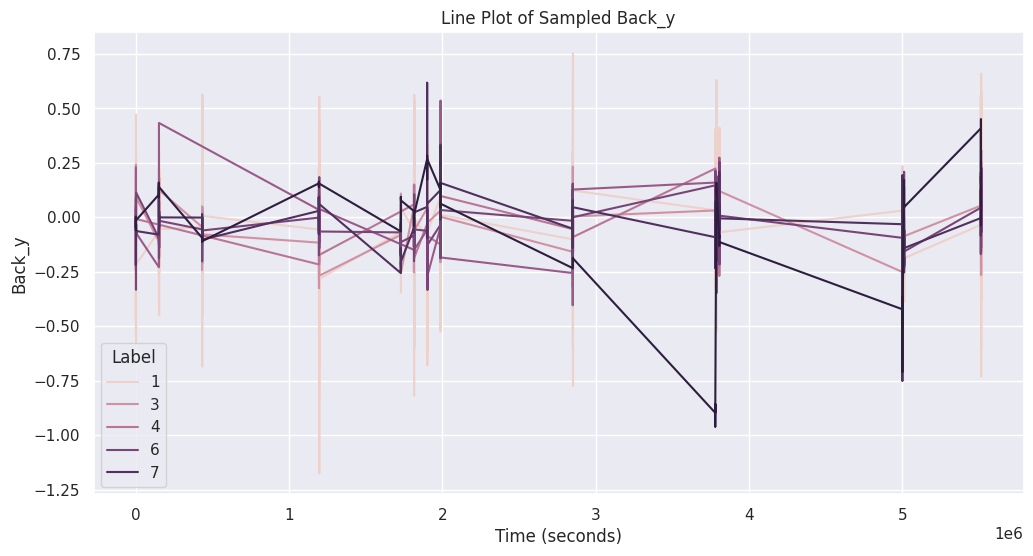

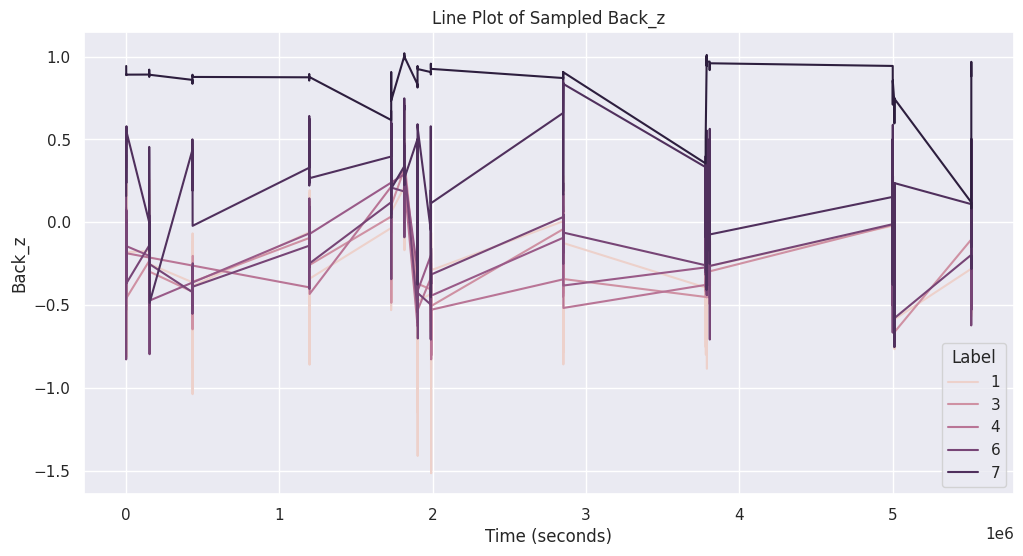

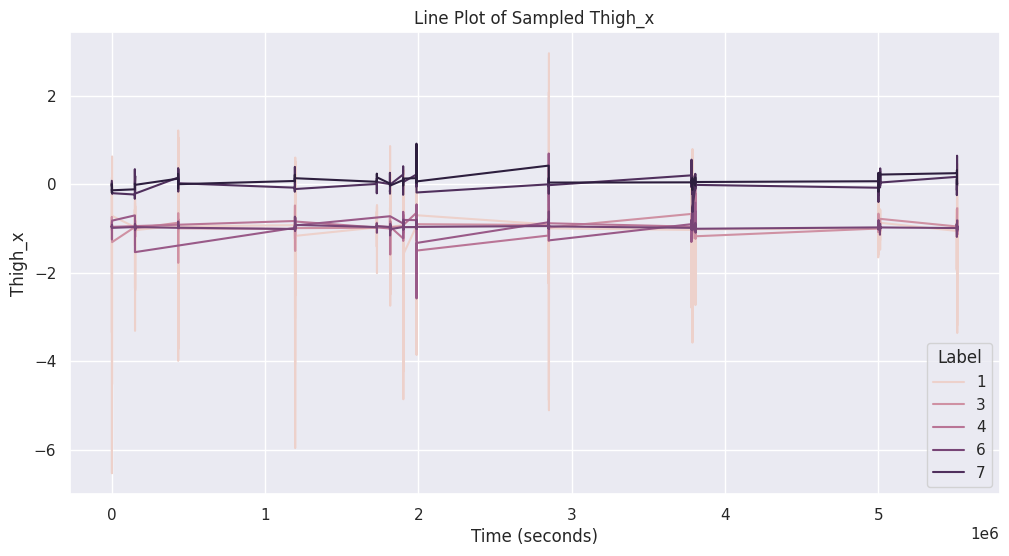

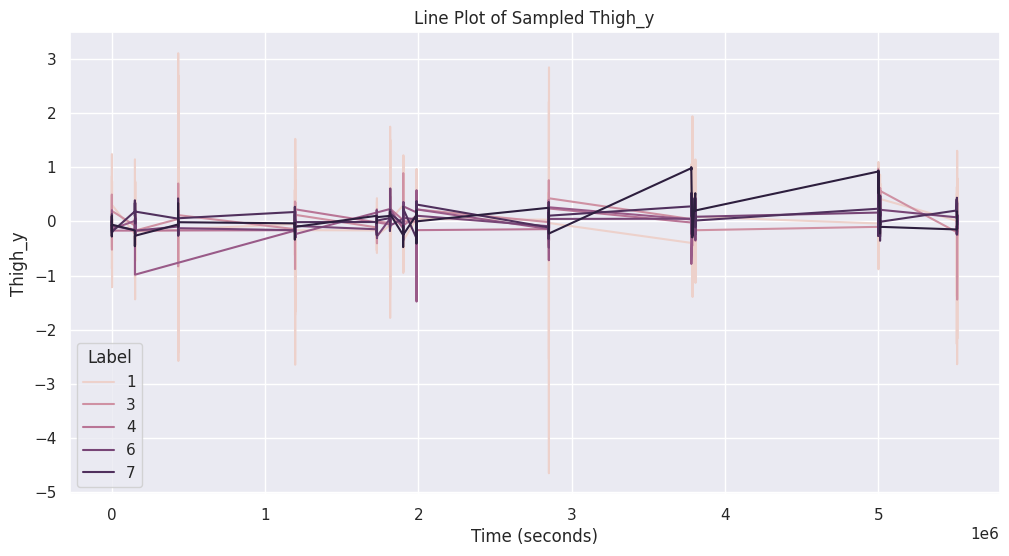

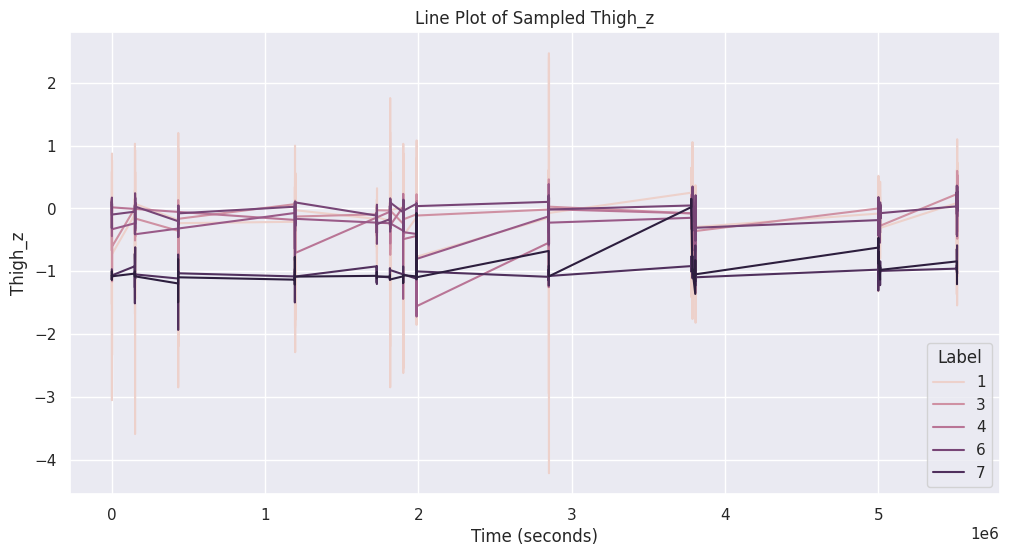

In [ ]:
###SOLO CORRER ESTE CODIGO SI EL DATASET ESTA PEQUEÑO (QUE NO ESTEN LOS 15 CSV CONCATENADOS). DE LO CONTRARIO CAMBIAR LA VARIABLE "FRAC"
df['timestamp'] = pd.to_datetime(df['timestamp'])

# muestra de datos usada
sampled_df = df.sample(frac=0.01)  # Adjust the fraction as needed

# cambiar a segundos el timestamp de inicio a fin
sampled_df['timestamp_seconds'] = (sampled_df['timestamp'] - sampled_df['timestamp'].min()).dt.total_seconds()

# line plots para cada columna
variables_to_plot = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']

plt.figure(figsize=(12, 6))

for variable in variables_to_plot:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=sampled_df, x='timestamp_seconds', y=variable, hue='label')
    plt.xlabel('Time (seconds)')
    plt.ylabel(f'{variable.capitalize()}')
    plt.title(f'Line Plot of Sampled {variable.capitalize()}')
    plt.legend(title='Label')
    plt.show()

Data Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


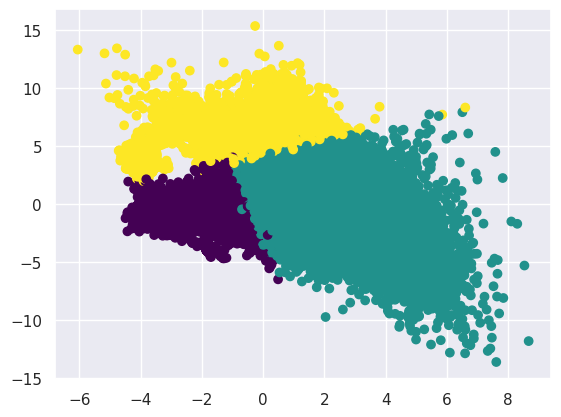

In [ ]:
clusters = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']
df_clusters = df[clusters]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clusters)

# hacer el elbow method o cualquier otro metodo para determinar num_clusters, falta!!!
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis')
plt.show()

## BALANCEO DE DATOS

In [ ]:
df = df.iloc[:, 1:]
df.head()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,-0.999023,-0.063477,0.140625,-0.980469,-0.112061,-0.048096,6
1,-0.980225,-0.079346,0.140625,-0.961182,-0.121582,-0.051758,6
2,-0.950195,-0.076416,0.140625,-0.949463,-0.080566,-0.067139,6
3,-0.954834,-0.059082,0.140381,-0.957520,-0.046143,-0.050781,6
4,-0.972412,-0.042969,0.142822,-0.977051,-0.023682,-0.026611,6


In [ ]:
x = df.iloc[:, 0:6]
y = df.iloc[:, 6]

In [ ]:
x.head()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z
0,-0.999023,-0.063477,0.140625,-0.980469,-0.112061,-0.048096
1,-0.980225,-0.079346,0.140625,-0.961182,-0.121582,-0.051758
2,-0.950195,-0.076416,0.140625,-0.949463,-0.080566,-0.067139
3,-0.954834,-0.059082,0.140381,-0.957520,-0.046143,-0.050781
4,-0.972412,-0.042969,0.142822,-0.977051,-0.023682,-0.026611


In [ ]:
y.unique()

array([6, 3, 1, 7, 8, 5, 4])

#probar un modelo con los datos como estan para ver si estan desbalanceados

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

In [ ]:
#df.dropna(inplace=True)
#df.isnull().sum()

In [ ]:
sampled_df = df.sample(frac=0.1)
x = sampled_df.iloc[:, 0:6]
y = sampled_df.iloc[:, 6]

In [ ]:
print("----- Imbalanced sample -----")
kf = StratifiedKFold(n_splits=3, shuffle=True)
clf = SVC(kernel='linear')
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    # Training phase
    x_train = x.iloc[train_index, :]
    y_train = y.iloc[train_index]
    clf.fit(x_train, y_train)

    # Test phase
    x_test = x.iloc[test_index, :]
    y_test = y.iloc[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Imbalanced sample -----


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.68      0.99      0.81     87078
           3       0.00      0.00      0.00      5036
           4       0.00      0.00      0.00       366
           5       0.00      0.00      0.00       447
           6       0.00      0.00      0.00     34266
           7       0.98      0.98      0.98     38249
           8       0.98      0.98      0.98     17814

    accuracy                           0.77    183256
   macro avg       0.38      0.42      0.40    183256
weighted avg       0.62      0.77      0.68    183256



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df['label'].value_counts()

1    869690
7    381770
6    343198
8    178762
3     50892
5      4522
4      3726
Name: label, dtype: int64

datos claramente desbalanceados

## probar diferentes metodos debalanceo de datos (NO USAR UNDERSAMPLING)

In [ ]:
sampled_df = df.sample(frac=0.1)
x = sampled_df.iloc[:, 0:6]
y = sampled_df.iloc[:, 6]
import warnings  # Import the warnings module
warnings.filterwarnings("ignore")

##### balancear datos usando Upsampling #####
print("----- Upsampling -----")
clf = SVC(kernel='linear')
kf = StratifiedKFold(n_splits=3, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    # Training phase
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]

    # Find unique class labels in the current fold
    unique_classes = y_train.unique()

    # Calculate the number of samples in the majority class (assuming class 7 is the majority class)
    majority_class_label = 7
    n_majority = (y_train == majority_class_label).sum()

    # Upsample each minority class if there are at least two unique classes
    for class_label in unique_classes:
        if class_label != majority_class_label:
            x_class = x_train[y_train == class_label]
            y_class = y_train[y_train == class_label]
            n_class = len(y_class)

            if n_class > 0:
                # Randomly select with replacement from the minority class to match the majority class
                ind = random.choices(range(n_class), k=n_majority)
                x_sub = pd.concat([x_class.iloc[ind], x_train[y_train == majority_class_label]], axis=0)
                y_sub = pd.concat([y_class.iloc[ind], y_train[y_train == majority_class_label]], axis=0)

                clf.fit(x_sub, y_sub)

    # Test phase
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), zero_division='warn'))

##### balancear datos usando weighted funtion #####
print("----- Weighted loss function -----")

clf = SVC(kernel='linear', class_weight='balanced')
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    # Training phase
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    clf.fit(x_train, y_train)

    # Test phase
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred),zero_division='warn'))

----- Upsampling -----
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       849
           3       0.00      0.00      0.00        59
           4       0.00      0.00      0.00         3
           5       0.00      0.67      0.01         6
           6       0.00      0.00      0.00       376
           7       0.63      1.00      0.77       371
           8       0.00      0.00      0.00       169

    accuracy                           0.20      1833
   macro avg       0.09      0.24      0.11      1833
weighted avg       0.13      0.20      0.16      1833

----- Weighted loss function -----
              precision    recall  f1-score   support

           1       0.70      0.25      0.37       849
           3       0.06      0.36      0.10        59
           4       0.00      0.00      0.00         3
           5       0.03      0.67      0.06         6
           6       0.44      0.56      0.49       376
           7       0

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold


PROBAR DIFERENTES MODELOS (AGREGAR 3-5 adicionales)

In [ ]:
sampled_df = df.sample(frac=0.5)
x = sampled_df.iloc[:, 0:6]
y = sampled_df.iloc[:, 6]

import warnings  # Import the warnings module
warnings.filterwarnings("ignore")


# Linear SVM
print('----- Linear-SVM -----')
kf = KFold(n_splits=3, shuffle=True)
cv_y_test = []
cv_y_pred = []
print(x)
for train_index, test_index in kf.split(x, y):
    x_train = x.iloc[train_index]  # Use DataFrame indexing
    y_train = y.iloc[train_index]  # Use DataFrame indexing
    x_test = x.iloc[test_index]    # Use DataFrame indexing
    y_test = y.iloc[test_index]    # Use DataFrame indexing

    clf = SVC(kernel='linear')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

# RBF SVM
print('----- RBF-SVM -----')
kf = StratifiedKFold(n_splits=3, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]

    clf = SVC(kernel='rbf')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

sampled_df = df.sample(frac=0.1)
x = sampled_df.iloc[:, 0:6]
y = sampled_df.iloc[:, 6]

# KNN
print('----- KNN -----')
kf = StratifiedKFold(n_splits=3, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]

    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

# Decision tree
print('----- Decision tree -----')
kf = StratifiedKFold(n_splits=3, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]

    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

# Linear Discriminant Analysis
print('----- Linear Discriminant Analysis -----')
kf = StratifiedKFold(n_splits=3, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]

    clf = LinearDiscriminantAnalysis()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


# Random Forest
print('----- Random Forest -----')
kf = StratifiedKFold(n_splits=3, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]

    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


# Gradient Boosting
print('----- Gradient Boosting -----')
kf = StratifiedKFold(n_splits=3, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]

    clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


# SVM con kernel polinómico
print('----- Polynomial SVM -----')
kf = StratifiedKFold(n_splits=3, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]

    clf = SVC(kernel='poly', degree=3)  # Ajusta el grado del polinomio según sea necesario
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))



----- Linear-SVM -----
          back_x    back_y    back_z   thigh_x   thigh_y   thigh_z
79265  -0.905762 -0.112305 -0.433105 -0.982422 -0.019531 -0.113281
69748  -0.942627  0.128662 -0.107910 -1.022705  0.048584 -0.207275
2614   -1.031006 -0.126465  0.007080 -0.003662  0.148682 -1.002686
92664  -0.871338 -0.260498 -0.416016 -0.924805 -0.051758 -0.216309
99071  -0.804688 -0.079834  0.515625 -0.205078 -0.199707 -1.044678
...          ...       ...       ...       ...       ...       ...
86756  -0.772217  0.018555  0.471680 -0.975098 -0.038086 -0.363525
98750  -0.899658  0.060791  0.409424  0.015869  0.154297 -0.979980
43300  -0.971191  0.022461 -0.167236 -1.028076  0.106201 -0.246338
133449 -0.895996  0.003418 -0.181396 -0.720459 -0.742188 -0.139160
54268  -0.949951 -0.156250  0.203125  0.070068 -0.054199 -0.989502

[91628 rows x 6 columns]
              precision    recall  f1-score   support

           1       0.68      0.99      0.81     43638
           3       0.00      0.00     

In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
import warnings  # Import the warnings module
warnings.filterwarnings("ignore")
sampled_df = df.sample(frac=0.3)
x = sampled_df.iloc[:, 1:6]
y = sampled_df.iloc[:, 6]

# Split your data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize lists to store predictions from each fold
rf_predictions = []
gb_predictions = []

# Random Forest
print('----- Random Forest -----')
kf = StratifiedKFold(n_splits=3, shuffle=True)

for train_index, val_index in kf.split(x_train, y_train):
    x_train_fold = x_train.iloc[train_index]
    y_train_fold = y_train.iloc[train_index]
    x_val_fold = x_train.iloc[val_index]

    clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf_rf.fit(x_train_fold, y_train_fold)
    y_pred_rf = clf_rf.predict(x_val_fold)
    rf_predictions.append(y_pred_rf)

# Gradient Boosting
print('----- Gradient Boosting -----')
kf = StratifiedKFold(n_splits=3, shuffle=True)

for train_index, val_index in kf.split(x_train, y_train):
    x_train_fold = x_train.iloc[train_index]
    y_train_fold = y_train.iloc[train_index]
    x_val_fold = x_train.iloc[val_index]

    clf_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
    clf_gb.fit(x_train_fold, y_train_fold)
    y_pred_gb = clf_gb.predict(x_val_fold)
    gb_predictions.append(y_pred_gb)

# Create a new training dataset for the meta-model using predictions from base models
x_meta_train = np.column_stack((np.concatenate(rf_predictions), np.concatenate(gb_predictions)))

# Train a meta-model (e.g., Logistic Regression) on the meta training dataset
from sklearn.linear_model import LogisticRegression

meta_model = LogisticRegression(random_state=42)
meta_model.fit(x_meta_train, y_train)

# Now, make predictions on the test set using the base models and meta-model
rf_test_predictions = clf_rf.predict(x_test)
gb_test_predictions = clf_gb.predict(x_test)

x_meta_test = np.column_stack((rf_test_predictions, gb_test_predictions))

# Use the meta-model to make final predictions on the test set
final_predictions = meta_model.predict(x_meta_test)

# Evaluate the final predictions
print(classification_report(y_test, final_predictions))


----- Random Forest -----
----- Gradient Boosting -----
              precision    recall  f1-score   support

           1       0.48      1.00      0.64     52241
           3       0.00      0.00      0.00      3077
           4       0.00      0.00      0.00       229
           5       0.00      0.00      0.00       293
           6       0.00      0.00      0.00     20435
           7       0.00      0.00      0.00     22926
           8       0.00      0.00      0.00     10753

    accuracy                           0.48    109954
   macro avg       0.07      0.14      0.09    109954
weighted avg       0.23      0.48      0.31    109954



Hacemos un modelos que nos de mayor recall

In [ ]:
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from imblearn.ensemble import BalancedRandomForestClassifier  # Import BalancedRandomForestClassifier

# Sampled data (adjust the fraction as needed)
sampled_df = df.sample(frac=0.5)
x = sampled_df.iloc[:, 0:6]
y = sampled_df.iloc[:, 6]

# Balanced Random Forest
print('----- Balanced Random Forest -----')
kf = StratifiedKFold(n_splits=3, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]

    clf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)  # Use BalancedRandomForestClassifier
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Balanced Random Forest -----
              precision    recall  f1-score   support

           1       0.98      0.60      0.74    435362
           3       0.14      0.58      0.23     25599
           4       0.03      0.73      0.06      1850
           5       0.02      0.59      0.04      2232
           6       0.87      0.83      0.85    171534
           7       1.00      1.00      1.00    190448
           8       1.00      1.00      1.00     89255

    accuracy                           0.76    916280
   macro avg       0.58      0.76      0.56    916280
weighted avg       0.94      0.76      0.82    916280



Ensablamos los dos modelos( random forest que nos dio alta precision en cada clase y balaned random forest que nos dio alto recall en cada clase.

In [ ]:
x = df.iloc[:, 0:6]
y = df.iloc[:, 6]
y.head()

0    6
1    6
2    6
3    6
4    6
Name: label, dtype: int64

In [ ]:
import random
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from imblearn.ensemble import BalancedRandomForestClassifier  # Import BalancedRandomForestClassifier
from sklearn.ensemble import VotingClassifier  # Import VotingClassifier

# Sampled data (adjust the fraction as needed)
sampled_df = df.sample(frac=0.5)
x = sampled_df.iloc[:, 0:6]
y = sampled_df.iloc[:, 6]

# Random Forest
print('----- Random Forest -----')
kf = StratifiedKFold(n_splits=3, shuffle=True)
cv_y_test_rf = []
cv_y_pred_rf = []

for train_index, test_index in kf.split(x, y):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]

    clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf_rf.fit(x_train, y_train)
    y_pred_rf = clf_rf.predict(x_test)

    cv_y_test_rf.append(y_test)
    cv_y_pred_rf.append(y_pred_rf)

print("Random Forest Classification Report:")
print(classification_report(np.concatenate(cv_y_test_rf), np.concatenate(cv_y_pred_rf)))

# Balanced Random Forest
print('----- Balanced Random Forest -----')
kf = StratifiedKFold(n_splits=3, shuffle=True)
cv_y_test_brf = []
cv_y_pred_brf = []

for train_index, test_index in kf.split(x, y):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]

    clf_brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
    clf_brf.fit(x_train, y_train)
    y_pred_brf = clf_brf.predict(x_test)

    cv_y_test_brf.append(y_test)
    cv_y_pred_brf.append(y_pred_brf)

print("Balanced Random Forest Classification Report:")
print(classification_report(np.concatenate(cv_y_test_brf), np.concatenate(cv_y_pred_brf)))

# Ensemble both classifiers
voting_clf = VotingClassifier(estimators=[
    ('random_forest', clf_rf),
    ('balanced_random_forest', clf_brf)
], voting='soft')

print('----- Ensemble: Random Forest + Balanced Random Forest -----')
kf = StratifiedKFold(n_splits=3, shuffle=True)
cv_y_test_ensemble = []
cv_y_pred_ensemble = []

for train_index, test_index in kf.split(x, y):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]

    voting_clf.fit(x_train, y_train)
    y_pred_ensemble = voting_clf.predict(x_test)

    cv_y_test_ensemble.append(y_test)
    cv_y_pred_ensemble.append(y_pred_ensemble)

print("Ensemble Classification Report:")
print(classification_report(np.concatenate(cv_y_test_ensemble), np.concatenate(cv_y_pred_ensemble)))

----- Random Forest -----
Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.97      0.94    434767
           3       0.62      0.06      0.12     25457
           4       0.79      0.08      0.14      1909
           5       0.74      0.03      0.06      2238
           6       0.89      0.90      0.90    171852
           7       1.00      1.00      1.00    190835
           8       1.00      1.00      1.00     89222

    accuracy                           0.94    916280
   macro avg       0.85      0.58      0.59    916280
weighted avg       0.93      0.94      0.92    916280

----- Balanced Random Forest -----
Balanced Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.61      0.75    434767
           3       0.14      0.58      0.23     25457
           4       0.03      0.72      0.06      1909
           5       0.02      0.58      0.0

# **SELECCION OPTIMA DE HIPERPARAMETROS**

In [ ]:
x = df.iloc[:, 0:6]
y = df.iloc[:, 6]
print(df.size)
print(x.sizey)
print(y.size)

In [ ]:
import random
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import VotingClassifier
import warnings  # Import the warnings module
warnings.filterwarnings("ignore")

sampled_df = df.sample(frac=0.5)
x = sampled_df.iloc[:, 0:6]
y = sampled_df.iloc[:, 6]


# Random Forest
print('----- Random Forest -----')
kf = StratifiedKFold(n_splits=3, shuffle=True)
cv_y_test_rf = []
cv_y_pred_rf = []

for train_index, test_index in kf.split(x, y):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]

    clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf_rf.fit(x_train, y_train)
    y_pred_rf = clf_rf.predict(x_test)

    cv_y_test_rf.append(y_test)
    cv_y_pred_rf.append(y_pred_rf)

print("Random Forest Classification Report:")
print(classification_report(np.concatenate(cv_y_test_rf), np.concatenate(cv_y_pred_rf)))

# Balanced Random Forest
print('----- Balanced Random Forest -----')
kf = StratifiedKFold(n_splits=3, shuffle=True)
cv_y_test_brf = []
cv_y_pred_brf = []

for train_index, test_index in kf.split(x, y):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]

    clf_brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
    clf_brf.fit(x_train, y_train)
    y_pred_brf = clf_brf.predict(x_test)

    cv_y_test_brf.append(y_test)
    cv_y_pred_brf.append(y_pred_brf)

print("Balanced Random Forest Classification Report:")
print(classification_report(np.concatenate(cv_y_test_brf), np.concatenate(cv_y_pred_brf)))

# Ensemble both classifiers
voting_clf = VotingClassifier(estimators=[
    ('random_forest', clf_rf),
    ('balanced_random_forest', clf_brf)
], voting='soft')  # You can use 'soft' voting for probability-based ensemble

# Suppress warnings using a context manager
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")  # Ignore all warnings within this context

    # Define the hyperparameter grid for tuning
    param_dist = {
        'random_forest__n_estimators': [50, 100, 150],
        'balanced_random_forest__n_estimators': [50, 100, 150],
        'balanced_random_forest__sampling_strategy': ['auto', 0.5, 0.75],
    }

    # Perform randomized search for hyperparameter tuning
    random_search = RandomizedSearchCV(estimator=voting_clf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
    random_search.fit(x, y)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)
best_random_forest_estimators = best_params['random_forest__n_estimators']
best_balanced_rf_estimators = best_params['balanced_random_forest__n_estimators']
best_sampling_strategy = best_params['balanced_random_forest__sampling_strategy']

# Create the ensemble model with the best hyperparameters
best_voting_clf = VotingClassifier(estimators=[
    ('random_forest', RandomForestClassifier(n_estimators=best_random_forest_estimators)),
    ('balanced_random_forest', BalancedRandomForestClassifier(n_estimators=best_balanced_rf_estimators, sampling_strategy=best_sampling_strategy))
], voting='soft')  # You can use 'soft' voting for probability-based ensemble

# Fit the ensemble model with the best hyperparameters
best_voting_clf.fit(x, y)

print('----- Ensemble with Best Hyperparameters -----')
kf = StratifiedKFold(n_splits=3, shuffle=True)
cv_y_test_best_ensemble = []
cv_y_pred_best_ensemble = []

for train_index, test_index in kf.split(x, y):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]

    best_voting_clf.fit(x_train, y_train)
    y_pred_best_ensemble = best_voting_clf.predict(x_test)

    cv_y_test_best_ensemble.append(y_test)
    cv_y_pred_best_ensemble.append(y_pred_best_ensemble)

print("Ensemble Classification Report with Best Hyperparameters:")
print(classification_report(np.concatenate(cv_y_test_best_ensemble), np.concatenate(cv_y_pred_best_ensemble)))


----- Random Forest -----
Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.97      0.94    434901
           3       0.59      0.06      0.11     25245
           4       0.81      0.07      0.14      1804
           5       0.74      0.04      0.07      2257
           6       0.89      0.90      0.90    171418
           7       1.00      1.00      1.00    191203
           8       1.00      1.00      1.00     89452

    accuracy                           0.94    916280
   macro avg       0.85      0.58      0.59    916280
weighted avg       0.93      0.94      0.93    916280

----- Balanced Random Forest -----
Balanced Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.60      0.75    434901
           3       0.14      0.58      0.23     25245
           4       0.03      0.73      0.06      1804
           5       0.02      0.58      0.0

## Con los hiperparámetros óptimos, ajustamos el modelo con todos los datos.

In [ ]:
import random
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import VotingClassifier
import warnings  # Import the warnings module
warnings.filterwarnings("ignore")


x = df.iloc[:, 0:6]
y = df.iloc[:, 6]

# Define the hyperparameters for the ensemble model
best_random_forest_estimators = 150  #
best_balanced_rf_estimators = 100  #
best_sampling_strategy = 'auto'  #

# Ensemble both classifiers with the defined hyperparameters
voting_clf = VotingClassifier(estimators=[
    ('random_forest', RandomForestClassifier(n_estimators=best_random_forest_estimators)),
    ('balanced_random_forest', BalancedRandomForestClassifier(n_estimators=best_balanced_rf_estimators, sampling_strategy=best_sampling_strategy))
], voting='soft')  # You can use 'soft' voting for probability-based ensemble

# Fit the ensemble model with the defined hyperparameters using the entire dataset
voting_clf.fit(x, y)

print('----- Ensemble with Defined Hyperparameters using All Data -----')
kf = StratifiedKFold(n_splits=3, shuffle=True)

# Perform cross-validation and generate predictions
cv_y_test_ensemble = []
cv_y_pred_ensemble = []

for train_index, test_index in kf.split(x, y):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]

    voting_clf.fit(x_train, y_train)
    y_pred_ensemble = voting_clf.predict(x_test)

    cv_y_test_ensemble.append(y_test)
    cv_y_pred_ensemble.append(y_pred_ensemble)

# Concatenate the results from all folds
cv_y_test_all_folds = np.concatenate(cv_y_test_ensemble)
cv_y_pred_all_folds = np.concatenate(cv_y_pred_ensemble)

# Generate a classification report for cross-validation results
print("Ensemble Classification Report with Defined Hyperparameters (Cross-Validation):")
print(classification_report(cv_y_test_all_folds, cv_y_pred_all_folds))

----- Ensemble with Defined Hyperparameters using All Data -----
Ensemble Classification Report with Defined Hyperparameters (Cross-Validation):
              precision    recall  f1-score   support

           1       0.94      0.94      0.94    869690
           3       0.33      0.27      0.30     50892
           4       0.33      0.39      0.36      3726
           5       0.34      0.22      0.26      4522
           6       0.88      0.91      0.90    343198
           7       1.00      1.00      1.00    381770
           8       1.00      1.00      1.00    178762

    accuracy                           0.93   1832560
   macro avg       0.69      0.67      0.68   1832560
weighted avg       0.93      0.93      0.93   1832560



In [ ]:
y_pred_ensemble = voting_clf.predict(x)

# Generate a classification report for the entire dataset
print("Ensemble Classification Report with Defined Hyperparameters (Entire Dataset):")
print(classification_report(y, y_pred_ensemble))

Ensemble Classification Report with Defined Hyperparameters (Entire Dataset):
              precision    recall  f1-score   support

           1       0.98      0.97      0.98    869690
           3       0.78      0.72      0.75     50892
           4       0.70      0.80      0.75      3726
           5       0.80      0.74      0.77      4522
           6       0.94      0.96      0.95    343198
           7       1.00      1.00      1.00    381770
           8       1.00      1.00      1.00    178762

    accuracy                           0.97   1832560
   macro avg       0.89      0.88      0.88   1832560
weighted avg       0.97      0.97      0.97   1832560



## Regularizar Ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
# Supongamos que tienes un conjunto de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión Ridge
alpha = 1.0  # Este es el hiperparámetro de regularización
ridge_model = Ridge(alpha=alpha)

# Entrenar el modelo
ridge_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = ridge_model.predict(X_test)

# Calcular el error cuadrático medio (MSE) en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

Error cuadrático medio (MSE): 2.6587387825748348


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Error function (it evaluates the mean squared error function for the specified model and data set).
def mse(X, y, beta):
  y_pred = X @ beta
  return (y - y_pred).sum()
# Gradient of error function (it evaluates the gradient of the mean squared error function for the specified model and data set).
def grad(x, y, beta, lambd):
  n = len(y)
  y_pred = x @ beta
  res = y - y_pred
  tmp = res*X.transpose()
  return -(2/n)*tmp.sum(axis = 1) + 2*lambd*beta

def fit_modelRidge(x,y,lambd = 0.1, alpha = 0.0005, maxit = 10000):
  npredictors = x.shape[1]

  beta = 2 * np.random.rand(npredictors)-1.0

  it = 0
  while (np.linalg.norm(grad(x,y,beta,lambd)) > 1e-4) and (it < maxit):
    beta = beta - alpha*grad(x,y,beta,lambd)
    it = it + 1
  return beta

lambdas = np.logspace(-2,3,50)
coefs=[]

scaler = StandardScaler()
X_normalized = scaler.fit_transform(x)

for l in lambdas:
  betaR = fit_modelRidge(X_normalized, y, l)
  coefs.append(betaR)

axis = plt.gca()
lineObjects = axis.plot(lambdas, coefs)
axis.set_xscale('log')
axis.set_xlim(axis.get_xlim()[::-1])
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

features = ['beta' + str(feat) for feat in range(coefs[0].shape[0])]
axis.legend(iter(lineObjects), features)

plt.show()

## Regularizar Lasso


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Supongamos que tienes un conjunto de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión Lasso
alpha = 1.0  # Este es el hiperparámetro de regularización
lasso_model = Lasso(alpha=alpha)

# Entrenar el modelo
lasso_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = lasso_model.predict(X_test)

# Calcular el error cuadrático medio (MSE) en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

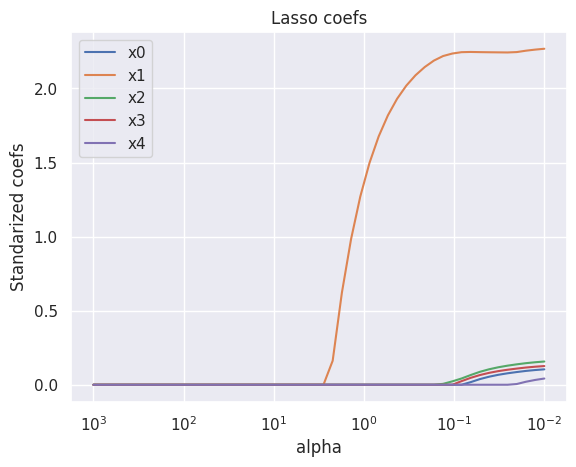

In [ ]:

X_train, x_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.8,random_state=42)

alphas = np.logspace(-2, 3, 50)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
  lasso.set_params(alpha=a)
  lasso.fit(X_train, y_train)
  coefs.append(lasso.coef_)

ax = plt.gca()

lineObjects = ax.plot(alphas,coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standarized coefs')
plt.title('Lasso coefs')
features = ['x' + str(feat) for feat in range(coefs[0].shape[0])]
ax.legend(iter(lineObjects), features)
plt.show()

que falta:

# **Regularizar datos:**


Regularización L1 (Lasso): En esta técnica, se agrega un término de penalización a la función de costo del modelo que es proporcional al valor absoluto de los coeficientes del modelo. Esto tiende a llevar a que algunos coeficientes sean exactamente iguales a cero, lo que efectivamente elimina esas características del modelo. Lasso es útil para la selección de características y la reducción de la dimensionalidad.

Regularización L2 (Ridge): En lugar de utilizar el valor absoluto de los coeficientes como en L1, la regularización L2 agrega un término de penalización que es proporcional al cuadrado de los coeficientes. Esto tiende a reducir los valores de los coeficientes, pero generalmente no los reduce exactamente a cero. Ridge es útil para evitar el sobreajuste al reducir los valores de los coeficientes.

# **balancear datos**
ya esta el codigo y las pruebas, solo falta probarlo con mas datos y decidir cual utilizar. Ya probamos que estan desbalanceados y corrimos dos metodos distintos para ver cual nos conviene. **Elejir uno y utilizarlo para el resto del modelaje**

#**agregar 3-5 modelos nuevos**
ya tenemos 5, agregar 3-5 mas de redes neuronales, tal vez incluir mas modelos lineales. Se puede ver que los modelos que ya tenemos tienen bajo rendimiento en las clases 3,4,5 porque no hemos balanceado los datos.

#correr el codigo con todos los datos para poder hacer lo de hiperparametros
ya esta el codigo solo falta probarlo con todos los datos y ver cuales son los hiperparametros optimos.

In [ ]:
pip install Flask

In [ ]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Cargar el modelo de clasificación previamente entrenado
modelo = joblib.load('modelo_clasificacion.pkl')

@app.route('/')
def hello_world():
    return '¡Servidor de clasificación en funcionamiento!'

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Obtener los datos de entrada del usuario
        data = request.get_json()

        # Realizar una predicción con el modelo cargado
        input_features = data['features']
        prediction = modelo.predict([input_features])

        # Devolver la predicción como respuesta JSON
        response = {'prediction': prediction.tolist()}
        return jsonify(response)

    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(debug=True)